## 결정 트리

+ 분류와 회귀 문제에 널리 사용하는 모델이다.
+ 예/아니오 질문을 이어 나가면서 학습


### 결정 트리 만들기

+ 결정트리를 학습한다 -> 정답에 가장 빨리 도달하는 예/아니오 질문(테스트) 목록을 학습한다.
+ 트리를 만들 때 가능한 모든 테스트에서 타깃값에 대해 가장 많은 정보를 가진 것을 고른다.
+ 계층적으로 영역을 **분할**해나가는 알고리즘
+ 분할된 영역이 한 개의 타깃값을 가질 때까지 반복된다.--> 리프노드 = **순수노드**

+ 새로운 데이터 포인트에 대한 예측은 **데이터 포인트가 특성을 분할한 영역들 중 어디에 놓이는지를 확인**
+ 회귀 문제에서의 예측은 **테스트 결과에 따라 트리를 탐색해 나가고 새로운 데이터 포인트에 해당하는 리프노드의 훈련 데이터 평균값이 데이터 포인트의 출력값이다.**


### 결정 트리의 복잡도 제어하기

리프노드가 순수 노드가 될 때까지 트리 만들기 --> 훈련 세트에 100% 정확하게 맞게됨 **(과대 적합)**

#### 과대적합을 막는 방법
> + **사전 가지치기**: 트리 생성을 일찍 중단하는 전략
> + **사후 가지치기 or 가지치기**: 트리를 만든 후 데이터 포인트가 적은 노드 삭제, 병합
+ scikit-learn에서는 DecisionTreeRegressor, DecisionTreeClassifier에서 구현 되어 있고, 사전 가지치기만 지원


In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state = 42)
tree = DecisionTreeClassifier(random_state= 0)#결정 트리 만들기 
tree.fit(X_train, y_train)
print("훈련 세트 정확도 : {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(tree.score(X_test, y_test)))

#이론과 같이 훈련 데이터에는 100%의 정확도를 지닌다. --> 과대적합

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.937


위와 같이 결정 트리의 깊이를 제한하지 않으면 트리는 무한정 깊어지고 복잡해지면서 새로운 데이터에 대해 잘 일반화 되지 않는다.
**max_depth**를 이용해서 연속된 질문의 개수를 제한한다. 

In [4]:
tree = DecisionTreeClassifier(max_depth = 4, random_state = 0) #질문의 개수를 4개로 한정
tree.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))

#훈련 세트의 정확도는 감소되었지만 테스트 세트의 정확도는 높아졌다. 


훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.951


### 결정 트리 분석
> 트리의 시각화 : export_graphviz함수를 이용

In [5]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file = "tree.dot", class_names = ["악성","양성"], feature_names=cancer.feature_names, impurity = False, filled = True)

In [7]:
import graphviz


with open('tree.dot','rt',encoding='UTF-8') as f:
    dot_graph = f.read()
    
display(graphviz.Source(dot_graph))

#dot = graphviz.Source(dot_graph)
#dot.format = 'png'
#dot.render(filename='tree', directory='./', cleanup=True)

ExecutableNotFound: failed to execute ['dot', '-Kdot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

+ samples : 각 노드에 있는 샘플의 수
+ vlaue : 클래스당 샘플의 수 


### 트리의 특성 중요도

+ **특성 중요도**: 트리를 만드는 결정에 각 특성이 얼마나 중요한지를 평가하는 지표, 0과 1사이의 숫자로 모든 특성의 중요도 합은 1이다.


특성 중요도
 [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 53945 missing from c

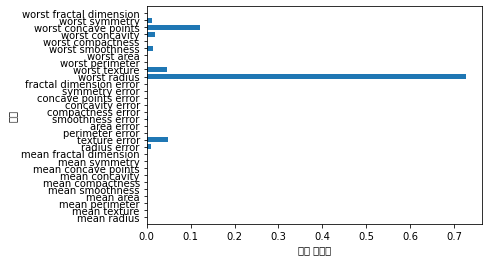

In [15]:
print("특성 중요도\n", tree.feature_importances_)


#시각화
import matplotlib.pyplot as plt
import numpy as np
import pandas
import mglearn

def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1] #양성, 음성
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1, n_features)
    
plot_feature_importances_cancer(tree)
    

+ 위의 표를 보면 worst radius라는 특성이 가장 중요하다고 알려준다


+ 이진분류 뿐만이 아니라 DecisionTreeRegressor로 구현된 회귀 결정 트리에서도 비슷하게 구현
> + 단, DecisionTreeRegressor은 외삽 --> 훈련 데이터의 **범위 밖의** 포인트에 대해 예측을 할 수 없다. 


Text(0, 0.5, '가격 ($/Mbyte)')

C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44201 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 44201 missing from curre

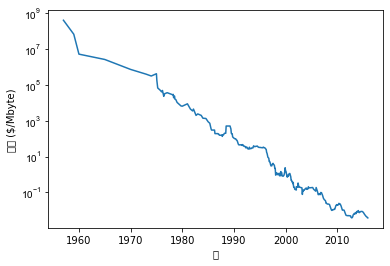

In [17]:
import os
import pandas as pd
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))

plt.yticks(fontname = "Arial")
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("년")
plt.ylabel("가격 ($/Mbyte)")


### 2000년 전까지의 데이터로부터 2000년 후의 가격을 예측(결정트리, 선형회귀)

In [21]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

data_train = ram_prices[ram_prices.date<2000] #훈련데이터
data_test = ram_prices[ram_prices.date>=2000] #테스트 데이터

X_train = data_train.date[:,np.newaxis] #날짜 특성만 이용
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

X_all = ram_prices.date[:, np.newaxis]#예측은 전체 기간에 대해서 수행
 
pred_tree =tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

price_tree= np.exp(pred_tree)
price_lr = np.exp(pred_lr)



<ipython-input-21-850727c838ca>:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_train = data_train.date[:,np.newaxis] #날짜 특성만 이용
<ipython-input-21-850727c838ca>:13: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_all = ram_prices.date[:, np.newaxis]#예측은 전체 기간에 대해서 수행


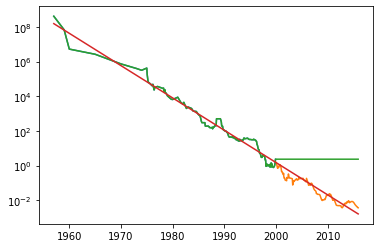

In [23]:
plt.semilogy(data_train.date, data_train.price , label= "훈련 데이터")
plt.semilogy(data_test.date, data_test.price , label= "테스트 데이터")
plt.semilogy(ram_prices.date, price_tree , label= "트리 예측")
plt.semilogy(ram_prices.date, price_lr , label= "선형회귀 예측")

+ 선형 모델은 직선으로 잘 예측함, 하지만 트리 모델은 훈련 데이터를 완벽하게 예측함, 하지만 데이터 범위밖으로 나가면(2000년데 이후) 예측할 능력이 없는 것을 알 수 있음. 

#### 장단점과 매개변수
+ max_depth, max_leaf_nodes, min_samples_leaf로 과대적합을 예방가능
+ 시각화를 할 수 있다.
+ 데이터 크기에 구애받지 않는다
+ 사전 가지치기를 사용함에도 불구하고 과대적합이 되는 경향이 있다. 